## 🧠 Projeto – Voting Classificação

Uma *EdTech* possui uma plataforma de vendas para oferta de seus produtos de educação e com o objetivo de priorizar melhor suas ações comerciais, quer desenvolver uma estratégia para **ampliar seu fator de conversão de leads** em vendas. Atualmente as informações referentes a este processo de vendas encontram-se em uma **ferramenta de CRM**, da qual podem ser extraídos alguns insights.

Desta forma, para apoiar no desenvolvimento desta estratégia, iremos trabalhar num **algoritmo de classificação** que possa **prever se um lead será ou não convertido em venda**.  
E dado o volume de dados e as *features* disponíveis, adotaremos o **método Voting de ensemble, usando algoritmos supervisionados de classificação**.

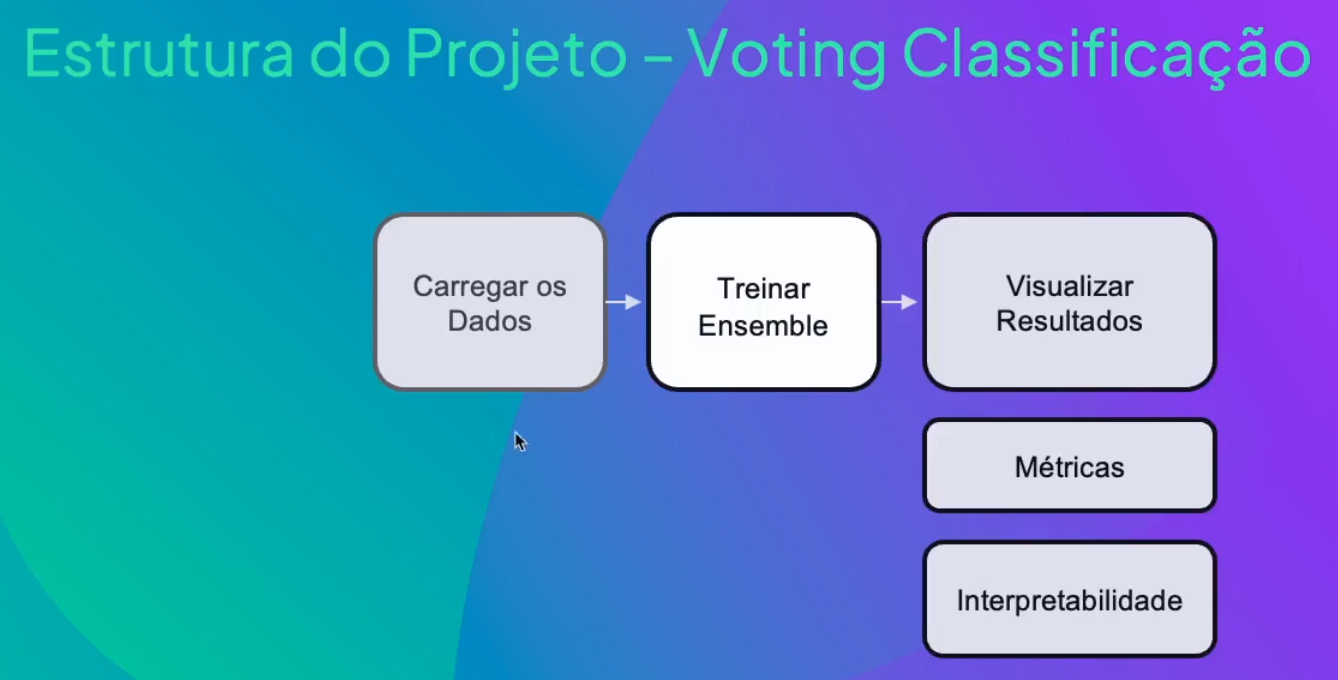

In [1]:
# Importar as bibliotecas

# EDA
import pandas as pd
import plotly.express as px
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Carregar os dados

In [3]:
# Carregar o dataset ja tratado
df_leads = pd.read_csv('./datasets/leads_cleaned.csv')

In [4]:
# Carregar as primeiras linhas
df_leads.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified
5,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,0,0,0,0,0,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,0,0,0,0,0,0,0,Modified
7,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,0,0,0,0,0,0,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
9,API,Google,0,0,0,4.0,58,4.0,Email Opened,0,0,0,0,0,0,0,Email Opened


In [5]:
# Carregar as ultimas linhas
df_leads.tail(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
9064,Landing Page Submission,Google,0,0,0,2.0,870,2.00,Email Opened,0,0,0,0,0,0,0,Email Opened
9065,Landing Page Submission,Google,0,0,1,8.0,1016,4.00,Email Opened,0,0,0,0,0,0,0,Email Opened
9066,Landing Page Submission,Direct Traffic,0,0,0,2.0,1770,2.00,SMS Sent,0,0,0,0,0,0,1,SMS Sent
9067,API,Direct Traffic,0,0,1,13.0,1409,2.60,SMS Sent,0,0,0,0,0,0,0,SMS Sent
9068,Landing Page Submission,Direct Traffic,0,0,1,5.0,210,2.50,SMS Sent,0,0,0,0,0,0,0,Modified
9069,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,0,0,0,0,0,0,0,Email Marked Spam
9070,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,0,0,0,0,0,0,1,SMS Sent
9071,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,0,0,0,0,0,0,1,SMS Sent
9072,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,0,0,0,0,0,0,0,SMS Sent
9073,Landing Page Submission,Direct Traffic,0,0,1,6.0,1279,3.00,SMS Sent,0,0,0,0,0,0,1,Modified


In [6]:
# Mostrar a estrutura do dataset
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Do Not Call                             9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Search                                  9074 non-null   int64  
 10  Newspaper Article                       9074 non-null   int6

### Preparação dos dados

In [7]:
# Preparar os dados (X e y)
X = df_leads.drop(columns='Converted')
y = df_leads['Converted']

In [8]:
# Usar preprocessor ja salvo
import joblib
preprocessor = joblib.load('./preprocessor_dataset_leads.pkl')

In [10]:
# Dividir o dataset entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Aplicar preprocessor
X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

In [11]:
# Mostrar a estrutura dos conjuntos
print(f'Conjunto de Treinamento: {X_train.shape}')
print(f'Conjunto de testes: {X_test.shape}')

Conjunto de Treinamento: (7259, 68)
Conjunto de testes: (1815, 68)


In [12]:
preprocessor.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], dtype='object'))])>

### Treinamento do Modelo de Voting Classifier

In [35]:
# Criar o modelo de VotingClassifier
lr_model = LogisticRegression(random_state=51)
# Para exucutar o modo de Soft Voting, é necessario colocar o hiperparametro probability = True no modelo SVC
svc_model = SVC(probability=True, kernel='linear')
tree_model = DecisionTreeClassifier(random_state=51)

voting_model = VotingClassifier(
    estimators = [
        ('logistic regression', lr_model),
        ('svc', svc_model),
        ('decision tree', tree_model)
    ],
    # Hard faz a votação pela maioria das predições dos estimadores
    # Soft faz a votação pela média das probabilidades de cada classe vindas de cada estimador
    voting='soft'
)


In [36]:
# Treinar o modelo
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic regression',
                              LogisticRegression(random_state=51)),
                             ('svc', SVC(kernel='linear', probability=True)),
                             ('decision tree',
                              DecisionTreeClassifier(random_state=51))],
                 voting='soft')

### Análise dos Resultados

In [37]:
# Realizar predicoes no conjunto de testes
y_pred = voting_model.predict(X_test)

In [38]:
# Visualizar y_pred
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [39]:
# Calcular metricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
# Mostrar metricas
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Acurácia: 0.7862258953168044
Precisão: 0.7203125
Recall: 0.6880597014925374
F1 Score: 0.7038167938931298


In [41]:
# Mostrar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

fig = px.imshow(conf_matrix,
    labels=dict(x='Predição', y='Real', color='Contagem'),
    x=['Not Converted', 'Converted'],
    y=['Not Converted', 'Converted'],
    color_continuous_scale='Viridis'
)

fig.update_traces(text=conf_matrix, texttemplate="%{z}")
fig.update_layout(coloraxis_showscale=False)

fig.show()

In [42]:
# Carregar as importâncias dos modelos
importances = []

for estimador in voting_model.estimators_:
    # Pra modelos lineares, retorna coef
    if hasattr(estimador, 'coef_'):
        importances.append(np.abs(estimador.coef_[0]))
    # Para modelos baseados em árvores
    elif hasattr(estimador, 'feature_importances_'):
        importances.append(estimador.feature_importances_)
    else:
        print(f'Não foi possível carregar as importâncias do modelo {type(estimador).__name__}')

In [43]:
# Calcular a media das importancias
importancia_media = np.mean(importances, axis=0)

In [44]:
# Nomes das features
feature_names = preprocessor.get_feature_names_out()

In [45]:
# Criar um dataframe com nomes e importancias das features
df_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importancia_media})

In [46]:
# Ordenar o dataframe pela importancia
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

In [47]:
# Plotar a importância das features
fig = px.bar(
    df_feature_importances,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Importância das Features (Voting Classifier)'
)

fig.update_layout(height=1280, width=1000)

fig.show()


### Propriedades do Modelo

In [ ]:
# Mostrar evidencias - Hard Voting

# Selecionar um registro da base para fazer a predicao
X_sample = X_test[7].reshape(1, -1)

# Predicoes individuais dos estimadores
log_pred = voting_model.named_estimators_['logistic regression'].predict(X_sample)
svc_pred = voting_model.named_estimators_['svc'].predict(X_sample)
tree_pred = voting_model.named_estimators_['decision tree'].predict(X_sample)

# Predicao final do Voting Classifier
voting_pred = voting_model.predict(X_sample)

In [34]:
# Exibir os resultados
print(f'Predição da Regressão Logística: {log_pred[0]}')
print(f'Predição do SVC: {svc_pred[0]}')
print(f'Predição da Árvore de Decisão: {tree_pred[0]}')
print(f'Predição final do Hard Voting (Votação Majoritária): {voting_pred[0]}')

Predição da Regressão Logística: 0
Predição do SVC: 0
Predição da Árvore de Decisão: 1
Predição final do Hard Voting (Votação Majoritária): 0


In [50]:
# Mostrar evidencias - Soft Voting

# Selecionar um registro da base para fazer a predicao
X_sample = X_test[340].reshape(1, -1)

# Predicoes individuais das probabilidades dos estimadores
log_proba = voting_model.named_estimators_['logistic regression'].predict_proba(X_sample)
svc_proba = voting_model.named_estimators_['svc'].predict_proba(X_sample)
tree_proba = voting_model.named_estimators_['decision tree'].predict_proba(X_sample)

# Predicao final do Voting Classifier
voting_pred = voting_model.predict(X_sample)
voting_proba = voting_model.predict_proba(X_sample)

In [51]:
# Exibir os resultados
print(f'Probabilidade da Regressão Logística: {log_proba[0]}')
print(f'Probabilidade do SVC: {svc_proba[0]}')
print(f'Probabilidade da Árvore de Decisão: {tree_proba[0]}')
print(f'Probabilidade final do Soft Voting (Votação Ponderada): {voting_proba[0]}')
print(f'Predição final do Soft Voting (Votação Ponderada): {voting_pred[0]}')

Probabilidade da Regressão Logística: [0.59404634 0.40595366]
Probabilidade do SVC: [0.62489726 0.37510274]
Probabilidade da Árvore de Decisão: [0. 1.]
Probabilidade final do Soft Voting (Votação Ponderada): [0.40631453 0.59368547]
Predição final do Soft Voting (Votação Ponderada): 1
